In [2]:
#Traigo la DB y la normalizo para despues alimentar la red 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("heart_statlog.csv")
columnas = ["age", "sex", "chest pain type", "resting bp s", "cholesterol", "fasting blood sugar", "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope", "target"]
all_data[columnas] = all_data[columnas] / all_data[columnas].max() #normalizo por valores máximos
all_data.describe() #describe de la db normalizada
all_data


#all_data
# Extraer las columnas de entrada
#all_data.columns()
#all_inputs = (all_data.iloc[:, 0:11].values)
#all_outputs = all_data.iloc[:, -1].values
#all_inputs.columns()
#all_data.describe()

#data_stats = all_inputs.describe().T
#df_n = (all_inputs - data_stats['mean']) / data_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
#df_n

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.519481,1.0,0.50,0.70,0.479270,0.0,0.0,0.851485,0.0,0.000000,0.333333,0.0
1,0.636364,0.0,0.75,0.80,0.298507,0.0,0.0,0.772277,0.0,0.161290,0.666667,1.0
2,0.480519,1.0,0.50,0.65,0.469320,0.0,0.5,0.485149,0.0,0.000000,0.333333,0.0
3,0.623377,0.0,1.00,0.69,0.354892,0.0,0.0,0.534653,1.0,0.241935,0.666667,1.0
4,0.701299,1.0,0.75,0.75,0.323383,0.0,0.0,0.603960,0.0,0.000000,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.584416,1.0,0.25,0.55,0.437811,0.0,0.0,0.653465,0.0,0.193548,0.666667,1.0
1186,0.883117,1.0,1.00,0.72,0.320066,1.0,0.0,0.698020,0.0,0.548387,0.666667,1.0
1187,0.740260,1.0,1.00,0.65,0.217247,0.0,0.0,0.569307,1.0,0.193548,0.666667,1.0
1188,0.740260,0.0,0.50,0.65,0.391376,0.0,1.0,0.861386,0.0,0.000000,0.666667,1.0


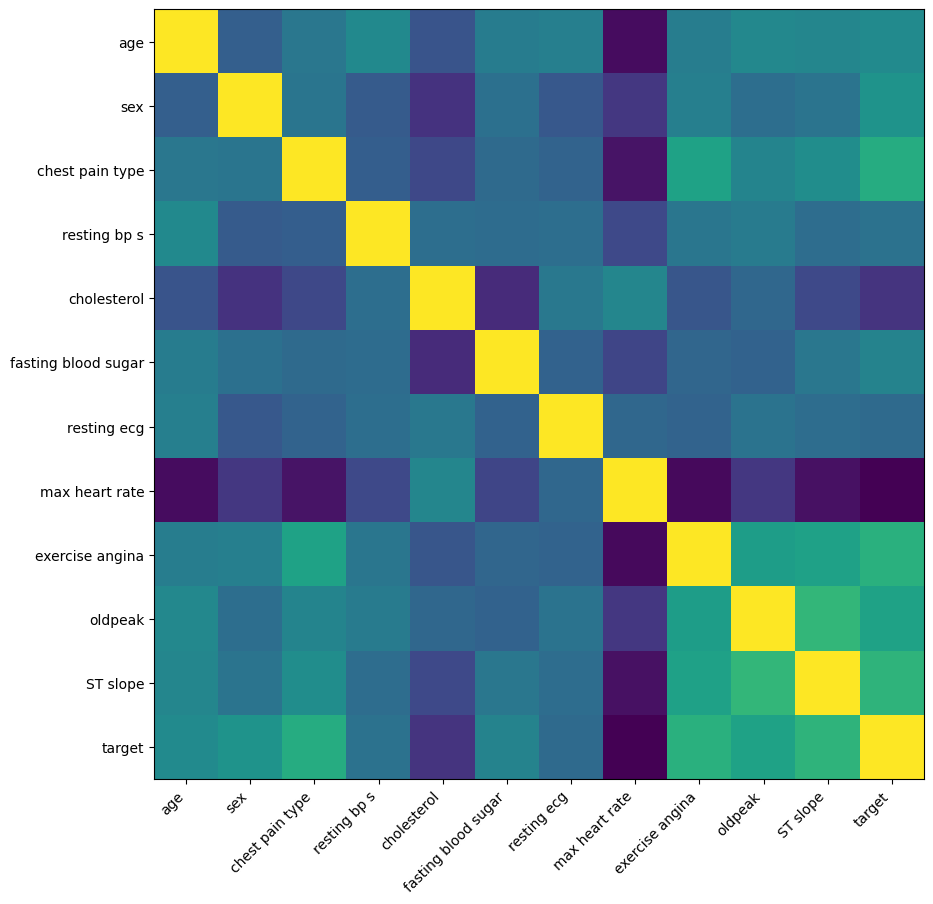

In [5]:
#Analizo la correlación de los datos

import matplotlib.pyplot as plt
labels = all_data.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((all_data.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(all_data.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(all_data.columns.to_list(), ha='right');

In [220]:
#Alimento y entreno mi red neuronal con la base de datos normalizada
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# all_data = pd.read_csv("heart_statlog.csv")

# Extraer las columnas de entrada
all_inputs = (all_data.iloc[:, 0:11].values)
all_outputs = all_data.iloc[:, -1].values

print("All inputs: ", all_inputs)
print("All outputs: ", all_outputs)

# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)
n = X_train.shape[0]

# La tasa de aprendizaje
L = 0.01 # 0.05 MEJOR TASA DE APRENDIZAJE HASTA AHORA

# Construir una red neuronal con pesos y sesgos
# iniciados aleatoriamente

np.random.seed(14)
# 11 neuronas ocultas con 11 pesos cada una (un peso por cada entrada)
# 1 neurona de salida con 11 pesos (un peso por cada neurona oculta)
w_hidden = np.random.rand(4, 11)
w_output = np.random.rand(1, 4) #4 NEURONAS EN CAPA OCULTA ES LO MEJOR HASTA AHORA

""" w_hidden2 = np.random.rand(4, 4)
b_hidden2 = np.random.rand(4, 1) """

#1 sesgo para cada una de las 11 neuronas ocultas
#1 sesgo para la neurona de salida
b_hidden = np.random.rand(4, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2 
test_comparisons = np.equal((test_predictions <= .5).flatten().astype(int), Y_test) #
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

print("-----------")
print("A2:", test_predictions)
print("COMPARISONS", test_comparisons)
print("ACCURACY: ", accuracy)


# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
# 1 solo forward prop (1 capa de salida)
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

""" def backward_prop(Z1, A1, Z12, A12, Z2, A2, X, Y):
    dC_dA2 = 2 * (A2 - Y)
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA12 = w_output
    dZ2_dW2 = A12
    dZ2_dB2 = 1
    
    dA12_dZ12 = d_relu(Z12)
    dZ12_dA1 = w_hidden2
    dZ12_dW12 = A1
    dZ12_dB12 = 1
    
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1
    
    # Cálculo de las derivadas para actualizar los pesos y sesgos
    dC_dW_output = dC_dA2 * dA2_dZ2 @ dZ2_dW2.T
    dC_dB_output = np.sum(dC_dA2 * dA2_dZ2 * dZ2_dB2, axis=1, keepdims=True)

    dC_dA12 = dC_dA2 * dA2_dZ2 @ dZ2_dA12.T
    dC_dW_hidden2 = dC_dA12 * dA12_dZ12 @ dZ12_dW12.T
    dC_dB_hidden2 = np.sum(dC_dA12 * dA12_dZ12 * dZ12_dB12, axis=1, keepdims=True)

    dC_dA1 = dC_dA12 * dA12_dZ12 @ dZ12_dA1.T
    dC_dW_hidden = dC_dA1 * dA1_dZ1 @ dZ1_dW1.T
    dC_dB_hidden = np.sum(dC_dA1 * dA1_dZ1 * dZ1_dB1, axis=1, keepdims=True)

    return dC_dW_hidden, dC_dB_hidden, dC_dW_hidden2, dC_dB_hidden2, dC_dW_output, dC_dB_output """

# Ejecutar descenso de gradiente
for i in range(30_000): #100_000 LA MEJOR CANTIDAD DE ITERACIONES HASTA AHORA
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2= forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)
    """dC_dW_hidden, dC_dB_hidden, dC_dW_hidden2, dC_dB_hidden2, dC_dW_output, dC_dB_output"""

    """ w_hidden -= L * dC_dW_hidden
    b_hidden -= L * dC_dB_hidden
    w_hidden2 -= L * dC_dW_hidden2
    b_hidden2 -= L * dC_dB_hidden2
    w_output -= L * dC_dW_output
    b_output -= L * dC_dB_output """

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Interactuar y probar con nuevos conjuntos de síntomas
def predict_probability(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope):
    X = np.array([[age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope]]).transpose()
    Z1, A1, Z2, A2 = forward_prop(X)
    print(A2)
    return A2

def predict_heart_disease(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope):
    output_values = predict_probability(age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope)
    if output_values > .5:
        return "Posible enfermedad cardíaca detectada" 
    else:
        return "Posiblemente sano"    

All inputs:  [[0.51948052 1.         0.5        ... 0.         0.         0.33333333]
 [0.63636364 0.         0.75       ... 0.         0.16129032 0.66666667]
 [0.48051948 1.         0.5        ... 0.         0.         0.33333333]
 ...
 [0.74025974 1.         1.         ... 1.         0.19354839 0.66666667]
 [0.74025974 0.         0.5        ... 0.         0.         0.66666667]
 [0.49350649 1.         0.75       ... 0.         0.         0.33333333]]
All outputs:  [0. 1. 0. ... 1. 1. 0.]
-----------
A2: [[0.99865696 0.99973114 0.99913819 0.9996667  0.98717827 0.99995505
  0.99953041 0.99913608 0.99085907 0.98827592 0.99821562 0.99979792
  0.99927257 0.99605238 0.99717583 0.99953462 0.99626146 0.99887244
  0.99806519 0.99945543 0.98461039 0.99977843 0.99979798 0.99943179
  0.99524184 0.99824558 0.99966081 0.9985651  0.99929585 0.99926345
  0.98679823 0.99980348 0.99992257 0.99898551 0.99995045 0.99667605
  0.99995551 0.98820911 0.99970268 0.99997923 0.9959243  0.99980061
  0.99945134 

In [221]:
#Testeo la precisión de la red neuronal post-entrenamiento

test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("A2: ", test_predictions)
print("ACCURACY: ", accuracy) #Rango de precision con los mejores valores: 81-86 #buscamos +90
#0.826 valor con 0.05

A2:  [[0.28637062 0.97320009 0.95427209 0.93144246 0.13570194 0.99401246
  0.80145949 0.72949889 0.0886627  0.09369425 0.69863486 0.44469711
  0.16860158 0.83946875 0.12843551 0.57427124 0.1679912  0.65482726
  0.44314309 0.67931365 0.10846474 0.99251238 0.78001712 0.89245403
  0.14736445 0.13962149 0.66573251 0.75496004 0.68651395 0.15712539
  0.0886627  0.95453565 0.97656671 0.68353794 0.93366739 0.14226433
  0.99829244 0.0886627  0.96426852 0.99797648 0.4431652  0.99688032
  0.3128078  0.24322742 0.92539263 0.21634356 0.0886627  0.17494403
  0.20377911 0.12873122 0.88907566 0.86902522 0.21742977 0.14143754
  0.9496954  0.7751102  0.09248104 0.96837911 0.94015713 0.96396835
  0.21819729 0.96211965 0.95988114 0.12326169 0.42314124 0.38831501
  0.98839299 0.74975449 0.95805867 0.0886627  0.12447142 0.99494861
  0.76772527 0.99102622 0.83301245 0.96506344 0.91703476 0.93828753
  0.82950374 0.09248104 0.96315483 0.11865175 0.10979234 0.0886627
  0.43384336 0.98811443 0.18528564 0.9639683

In [8]:
#agarro 10 personas de la db para probar el funcionamiento de la red con los registros mas visibles (primeros y ultimos 5 del .csv)
pacientes = {
    "Santiago": [0.519481,	1.0,	0.50,	0.70,	0.479270,	0.0,	0.0,	0.851485,	0.0,	0.000000,	0.333333], #primeros 5 de la db normalizada
    "Lorenzo": [0.636364,	0.0,	0.75,	0.80,	0.298507,	0.0,	0.0,	0.772277,	0.0,	0.161290,	0.666667], 	
    "Dante": [0.480519,	1.0,	0.50,	0.65,	0.469320,	0.0,	0.5,	0.485149,	0.0,	0.000000,	0.333333], 
    "Bruma": [0.623377,	0.0,	1.00,	0.69,	0.354892,	0.0,	0.0,	0.534653,	1.0,	0.241935,	0.666667], 
    "Martina": [0.701299,	1.0,	0.75,	0.75,	0.323383,	0.0,	0.0,	0.603960,	0.0,	0.000000,	0.333333], 
    "Alison": [0.584416,	1.0,	0.25,	0.55,	0.437811,	0.0,	0.0,	0.653465,	0.0,	0.193548,	0.666667], #ultimos 5 de la db normalizada
    "Guille": [0.883117,	1.0,	1.00,	0.72,	0.320066,	1.0,	0.0,	0.698020,	0.0,	0.548387,	0.666667], 
    "Luis": [0.740260,	1.0,	1.00,	0.65,	0.217247,	0.0,	0.0,	0.569307,	1.0,	0.193548,	0.666667], 
    "Josefina": [0.740260,	0.0,	0.50,	0.65,	0.391376,	0.0,	1.0,	0.861386,	0.0,	0.000000,	0.666667], 
    "Tomás": [0.493506,	1.0,	0.75,	0.69,	0.290216,	0.0,	0.0,	0.856436,	0.0,	0.000000,	0.333333], 
}

In [9]:
for nombre, valorSintomas in pacientes.items():
    print('-------------------------------')
    print(nombre, valorSintomas)
    [age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope] = valorSintomas
    print(predict_heart_disease(int(age), int(sex), int(chest_pain_type), int(resting_bps), int(cholesterol), int(fasting_blood_sugar), int(resting_ecg), int(max_heart_rate), int(exercise_angina), float(oldpeak), int(ST_slope)))

-------------------------------
Santiago [0.519481, 1.0, 0.5, 0.7, 0.47927, 0.0, 0.0, 0.851485, 0.0, 0.0, 0.333333]
[[0.13270096]]
Posiblemente sano
-------------------------------
Lorenzo [0.636364, 0.0, 0.75, 0.8, 0.298507, 0.0, 0.0, 0.772277, 0.0, 0.16129, 0.666667]
[[0.13270096]]
Posiblemente sano
-------------------------------
Dante [0.480519, 1.0, 0.5, 0.65, 0.46932, 0.0, 0.5, 0.485149, 0.0, 0.0, 0.333333]
[[0.13270096]]
Posiblemente sano
-------------------------------
Bruma [0.623377, 0.0, 1.0, 0.69, 0.354892, 0.0, 0.0, 0.534653, 1.0, 0.241935, 0.666667]
[[0.17959226]]
Posiblemente sano
-------------------------------
Martina [0.701299, 1.0, 0.75, 0.75, 0.323383, 0.0, 0.0, 0.60396, 0.0, 0.0, 0.333333]
[[0.13270096]]
Posiblemente sano
-------------------------------
Alison [0.584416, 1.0, 0.25, 0.55, 0.437811, 0.0, 0.0, 0.653465, 0.0, 0.193548, 0.666667]
[[0.13270096]]
Posiblemente sano
-------------------------------
Guille [0.883117, 1.0, 1.0, 0.72, 0.320066, 1.0, 0.0, 0.6980

In [ ]:
#Para probar individualmente - implementar funcion para normalizar post-ingreso de datos
while True:
    col_input = input("Predict heart disease. Input symptoms Age, Sex, Chest pain type, Resting bp/s, Cholesterol, Fasting blood sugar, Resting ec/g, Max heart rate, Excercise angina, Oldpeak, ST_slope: ")
    (age, sex, chest_pain_type, resting_bps, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina, oldpeak, ST_slope) = col_input.split(",")
    print(predict_heart_disease(int(age), int(sex), int(chest_pain_type), int(resting_bps), int(cholesterol), int(fasting_blood_sugar), int(resting_ecg), int(max_heart_rate), int(exercise_angina), int(oldpeak), int(ST_slope)))